# Experiment 1

## Configuration

CW Matrix : `64 * 1`

2D Histogram : `8 * 8`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/results_64*1_winequality-white.csv", sep=";")
data.head(5)

,exp_name,mse_hist,mse_sketch
0,fixed acidity * volatile acidity,0.000015,101.632622
1,fixed acidity * volatile acidity,0.001451,419.437408
2,fixed acidity * volatile acidity,0.005558,9.496983
3,fixed acidity * volatile acidity,0.000749,474.943787
4,fixed acidity * volatile acidity,0.000040,871.838684


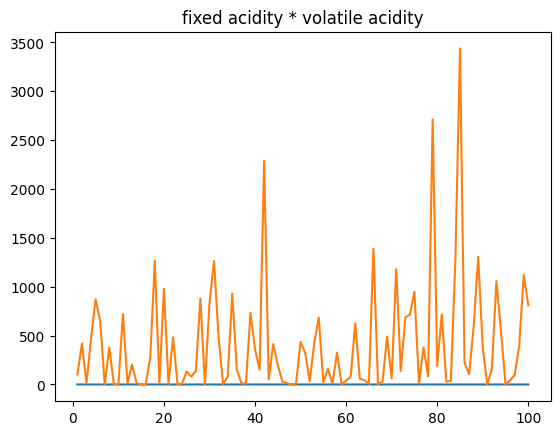

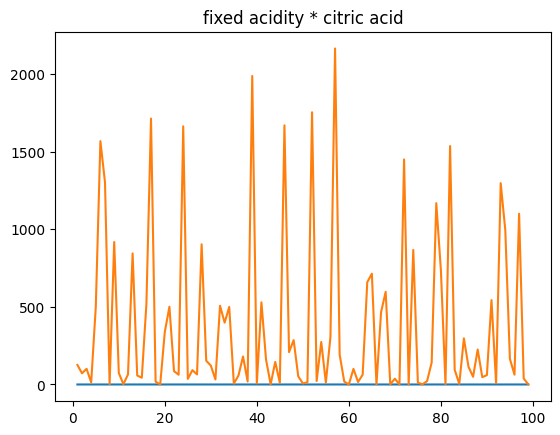

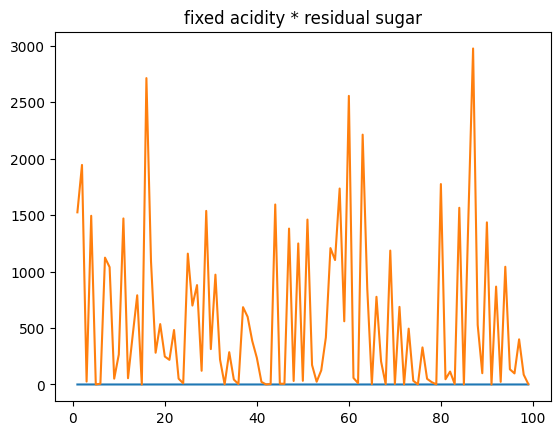

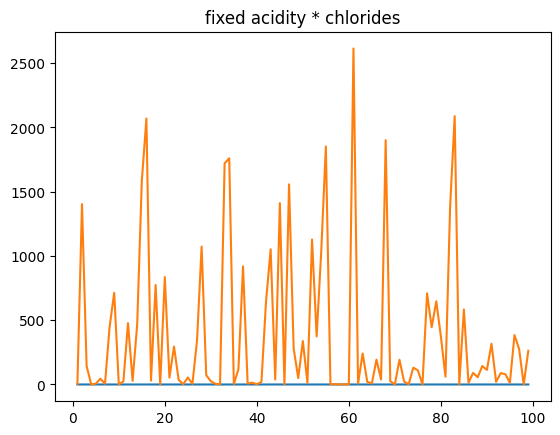

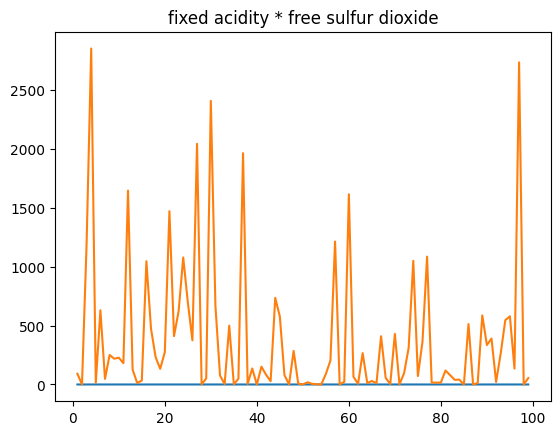

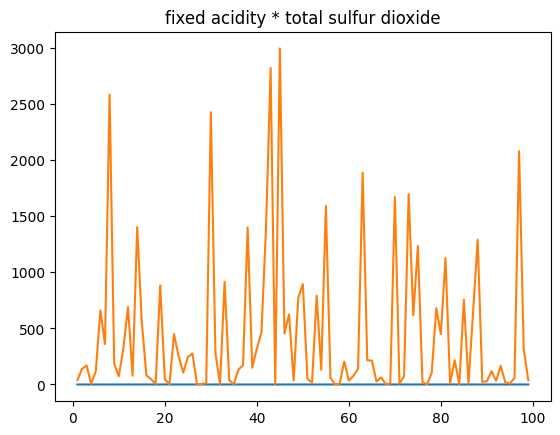

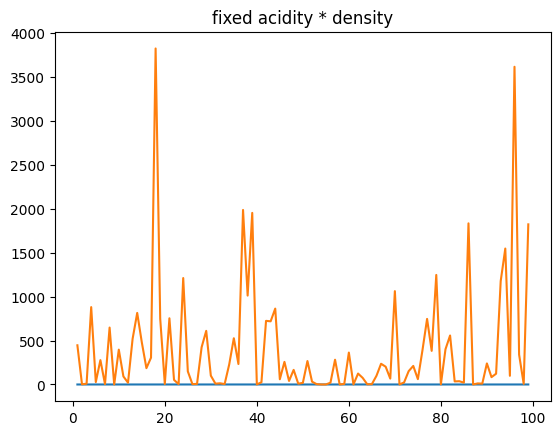

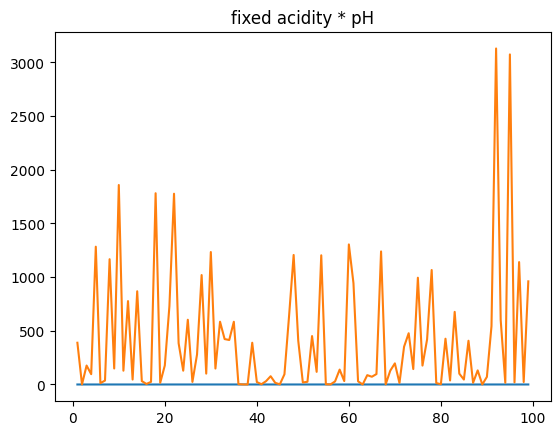

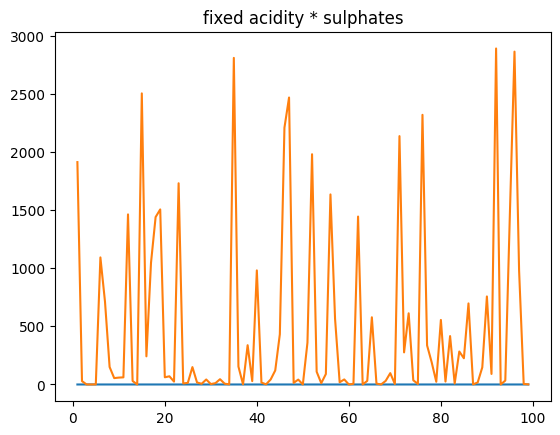

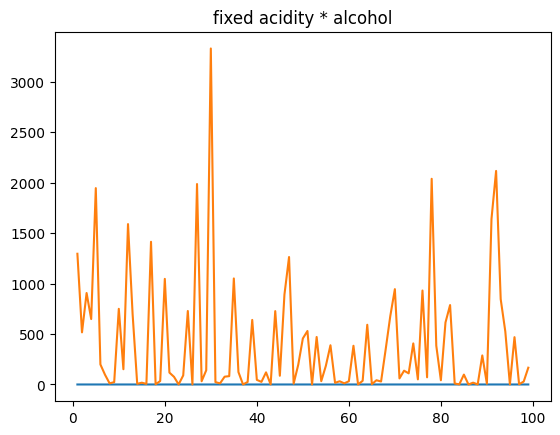

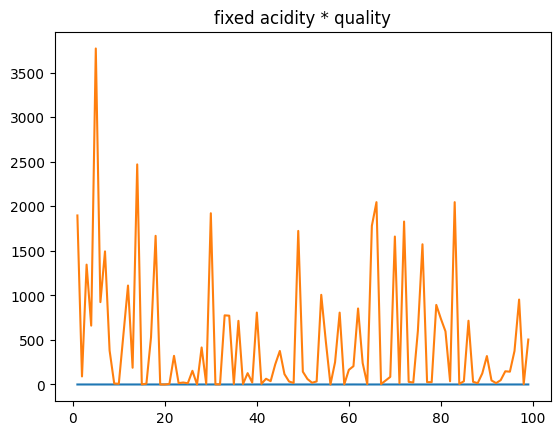

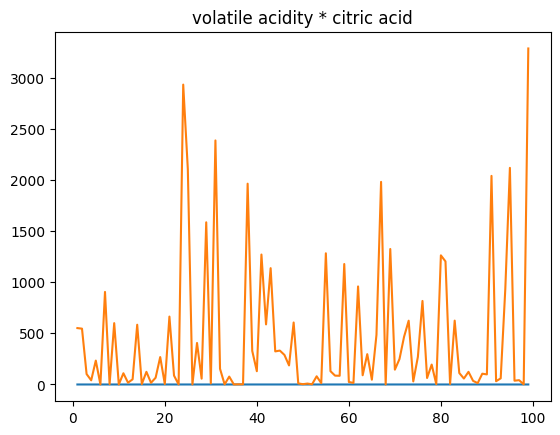

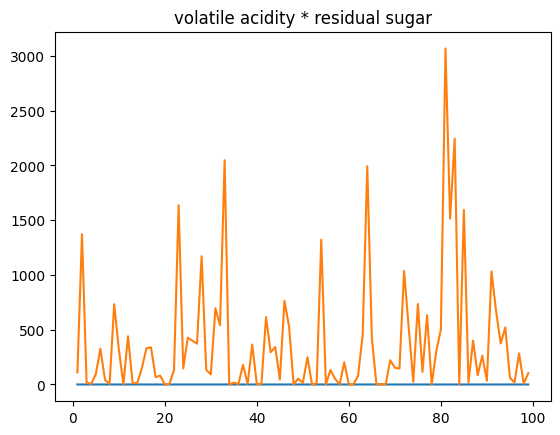

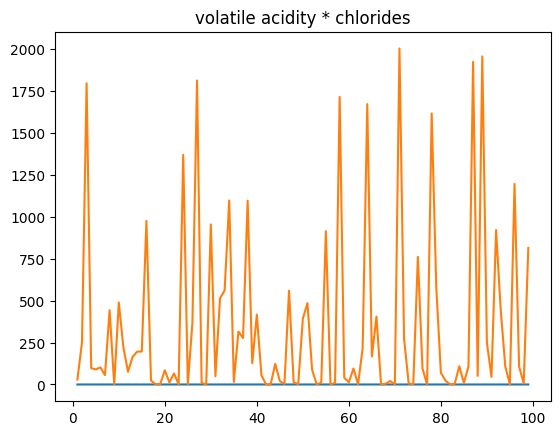

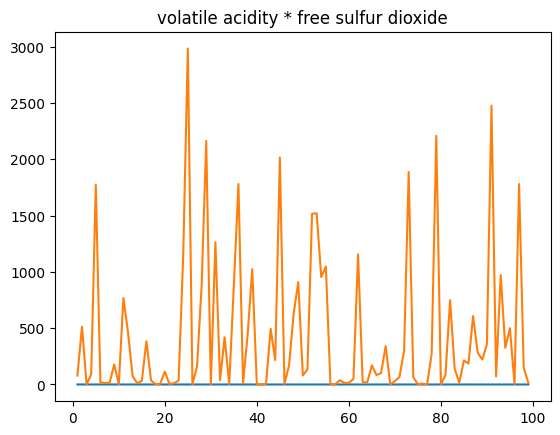

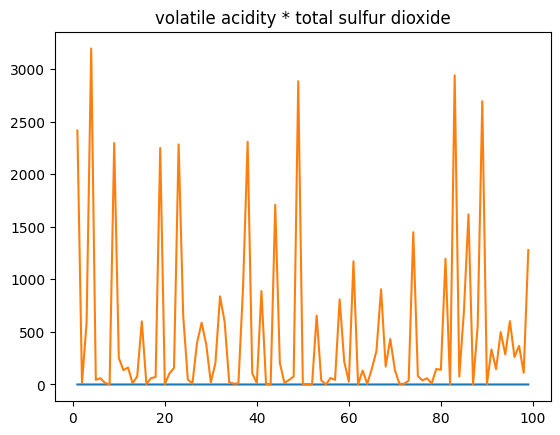

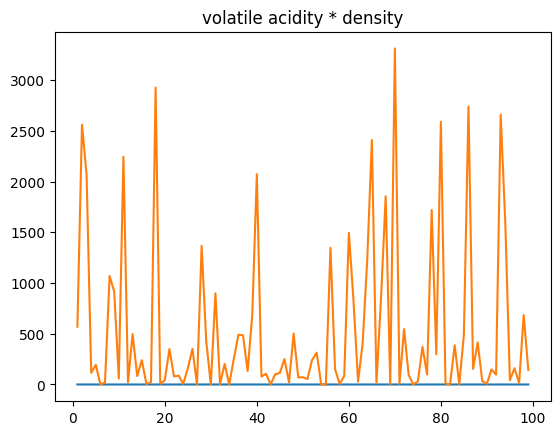

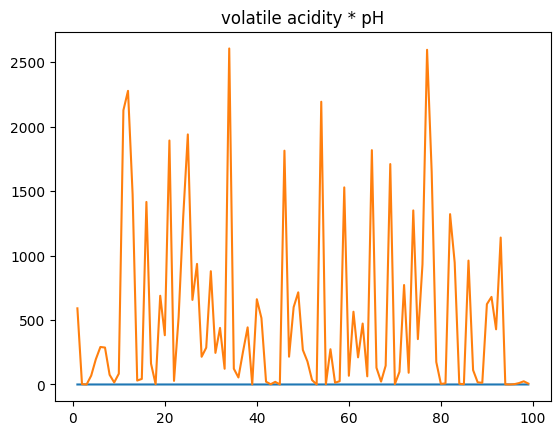

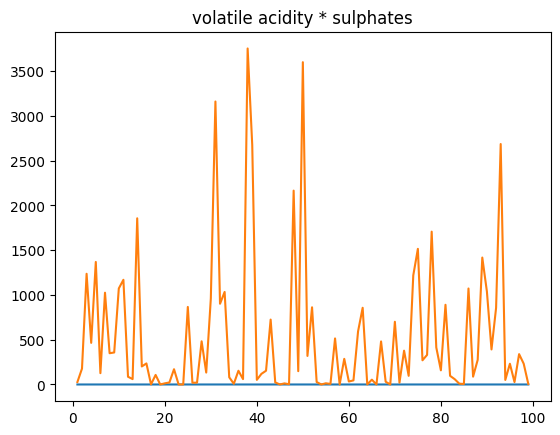

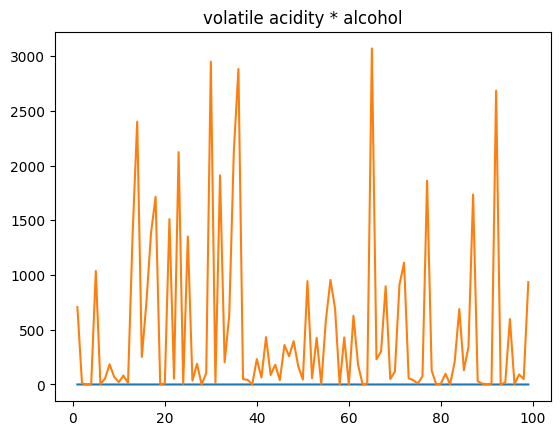

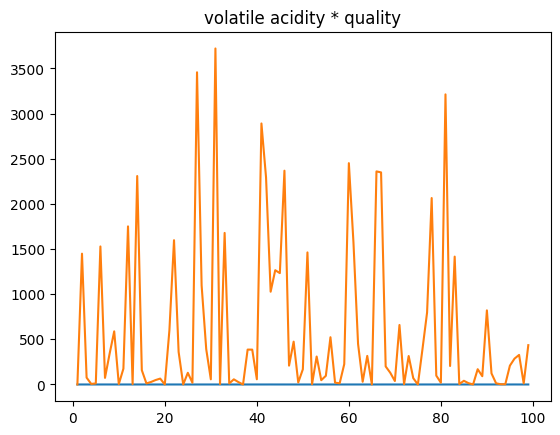

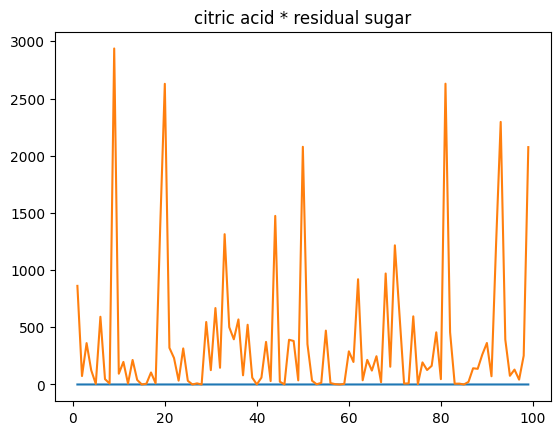

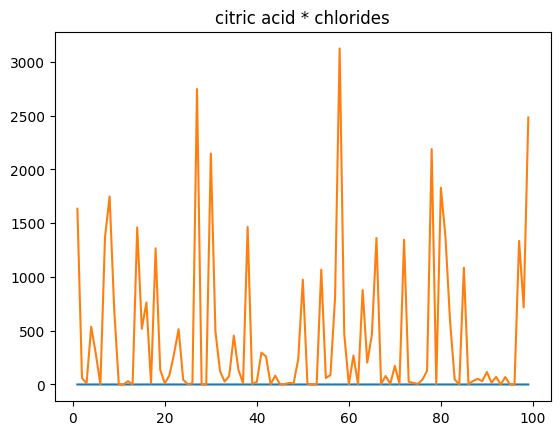

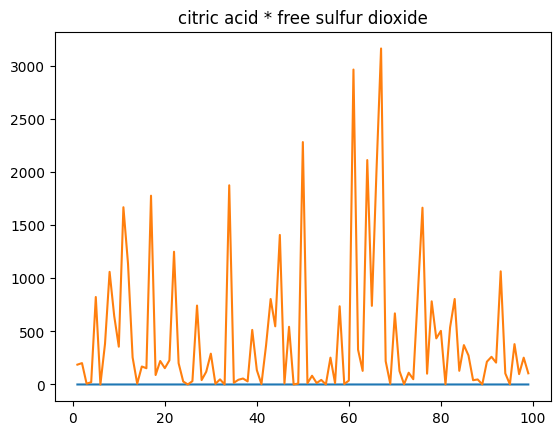

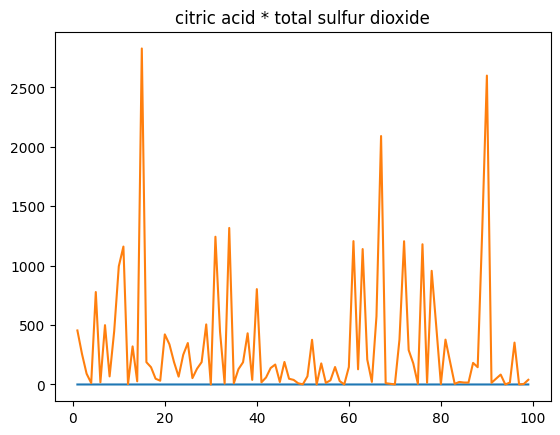

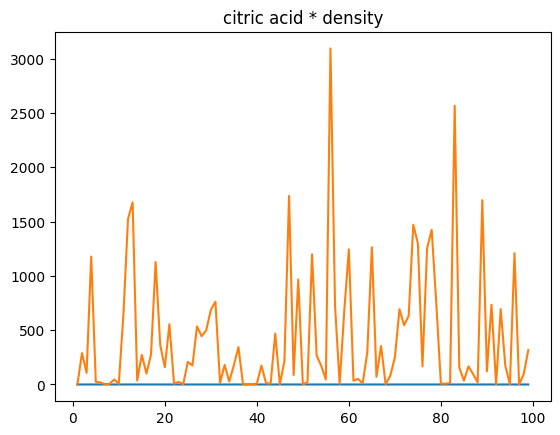

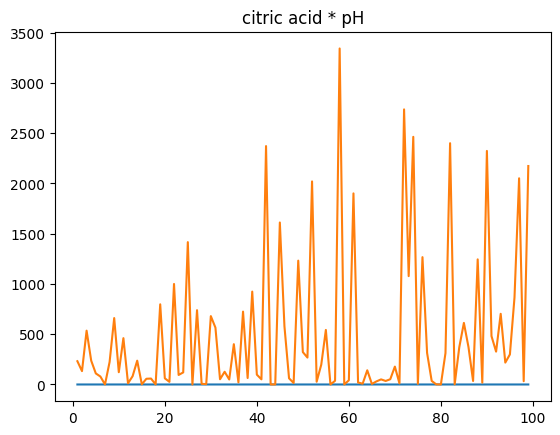

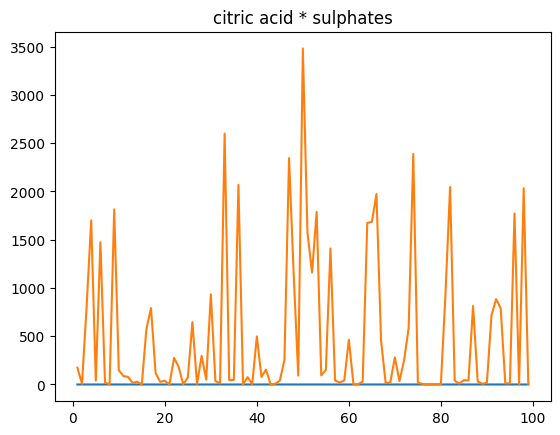

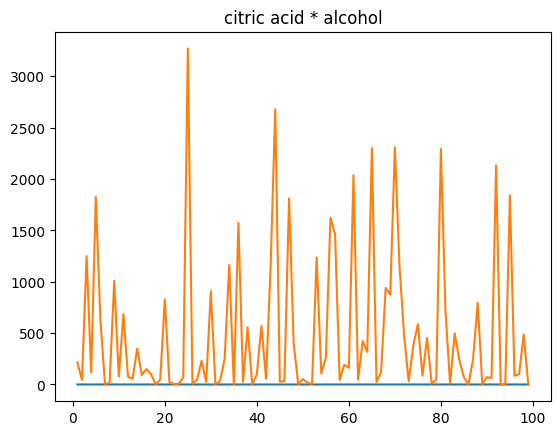

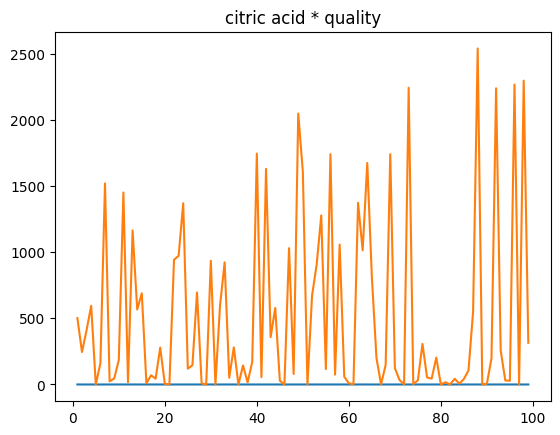

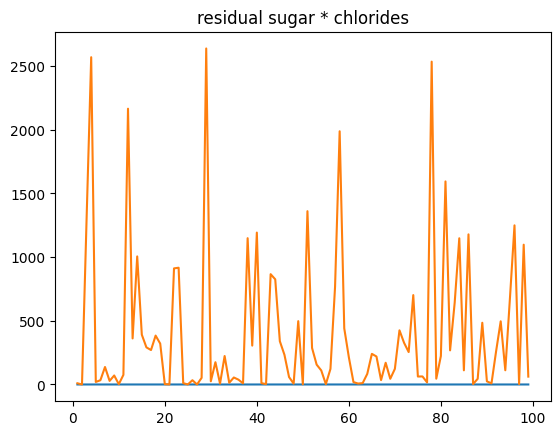

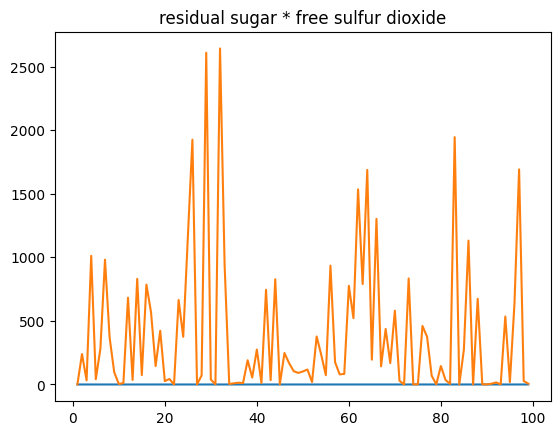

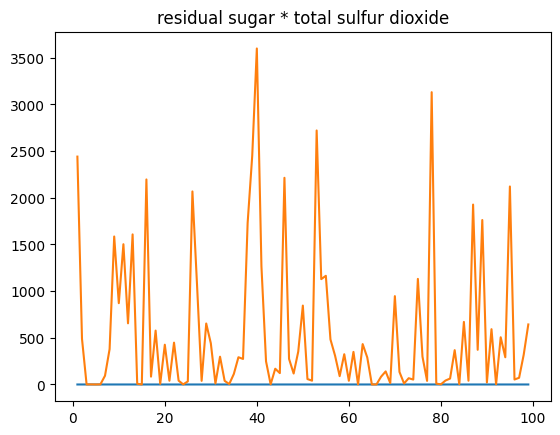

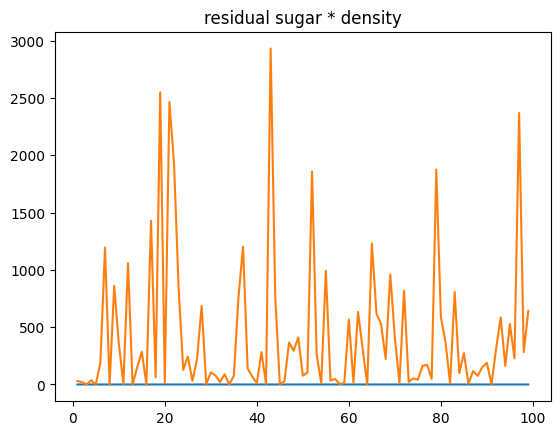

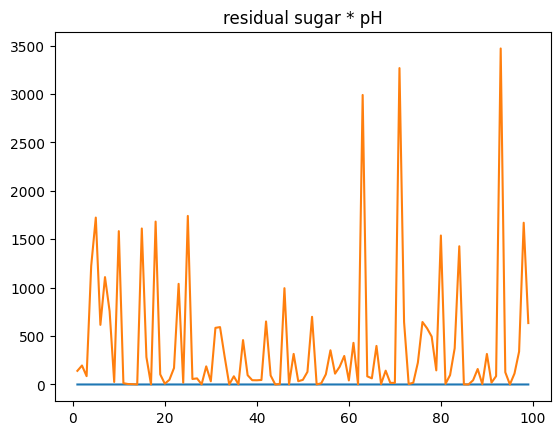

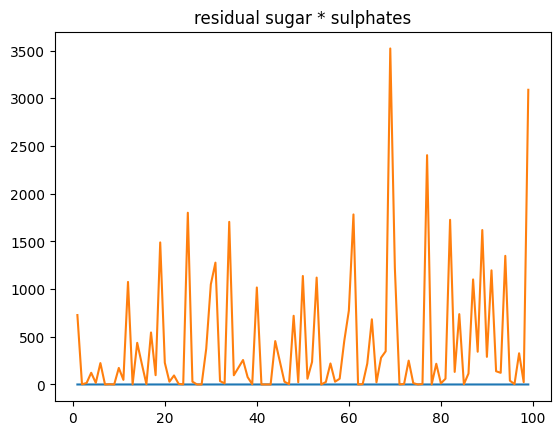

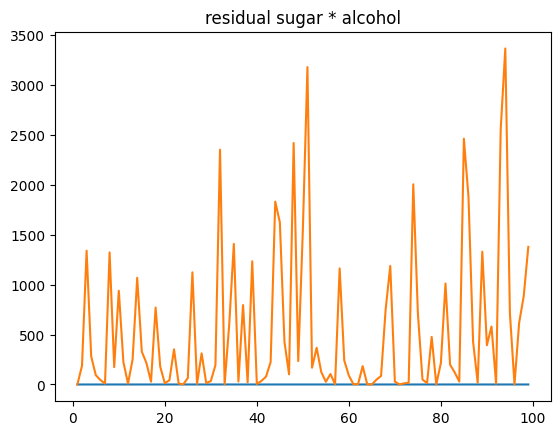

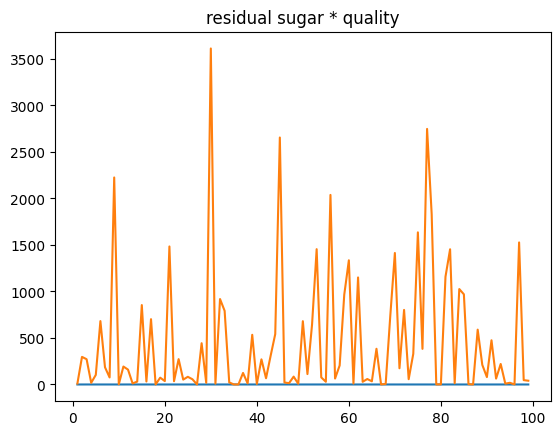

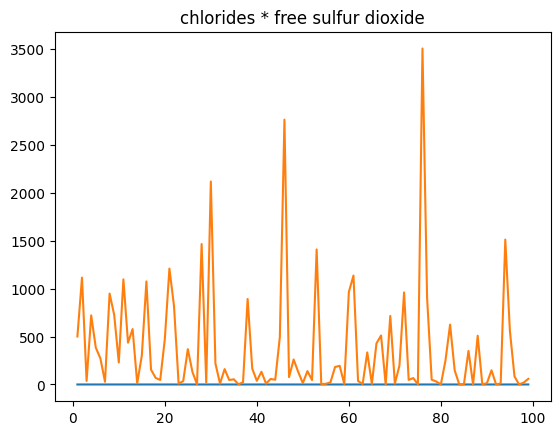

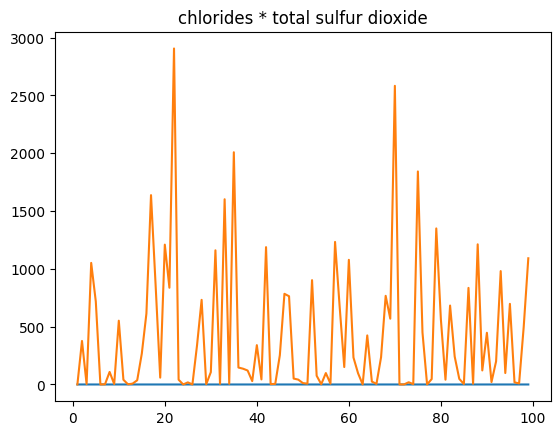

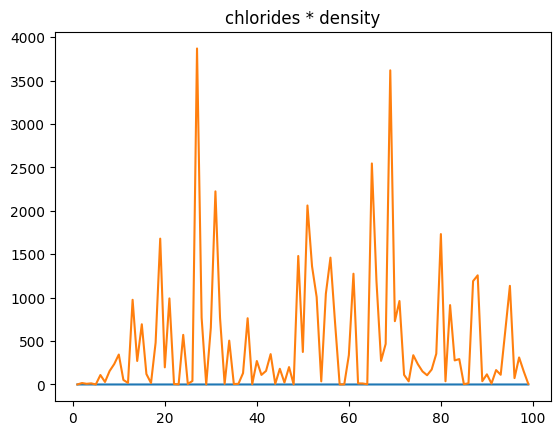

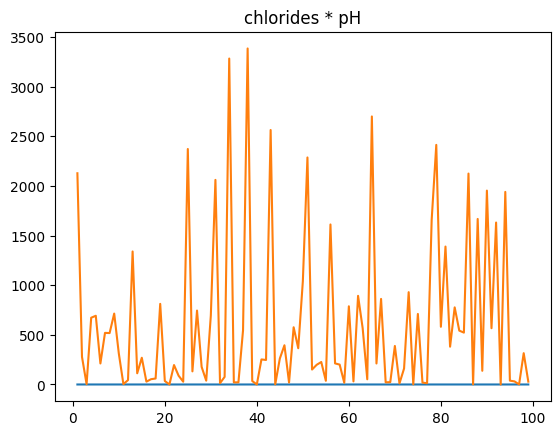

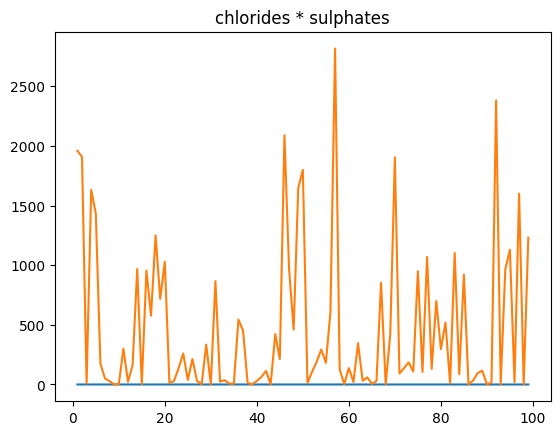

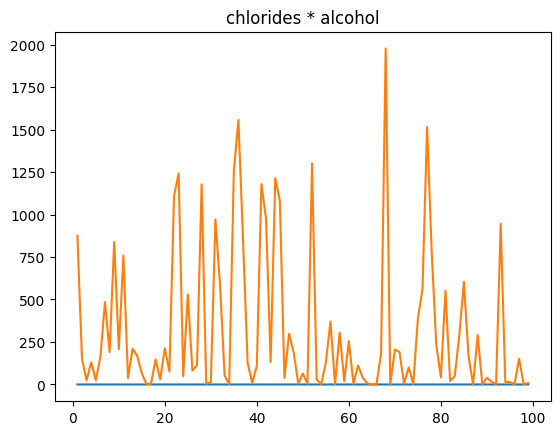

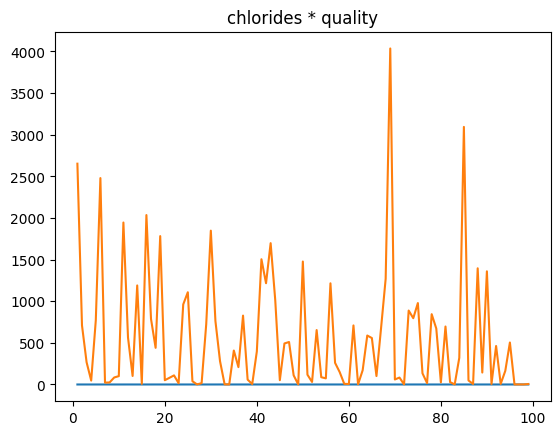

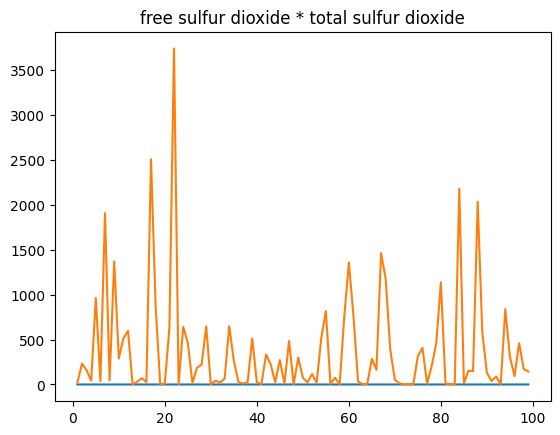

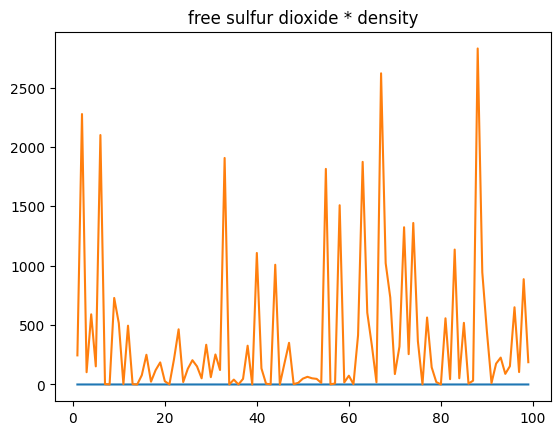

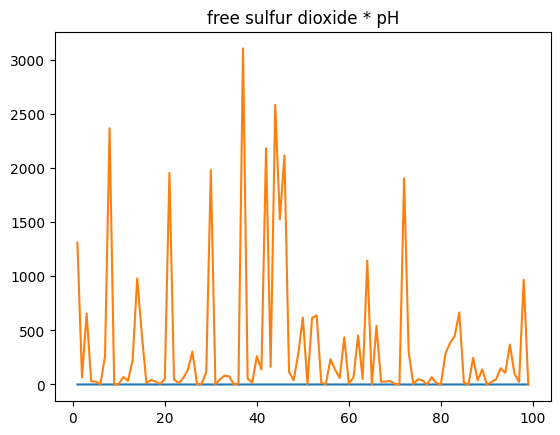

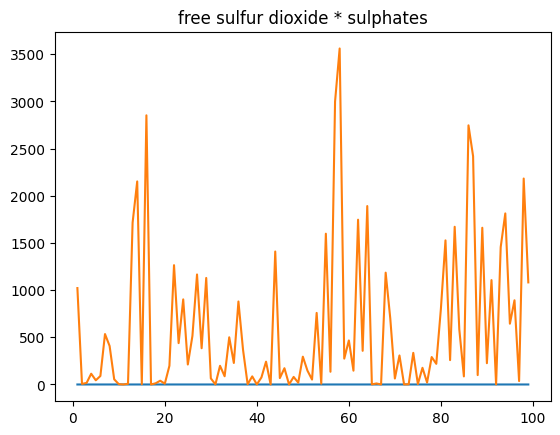

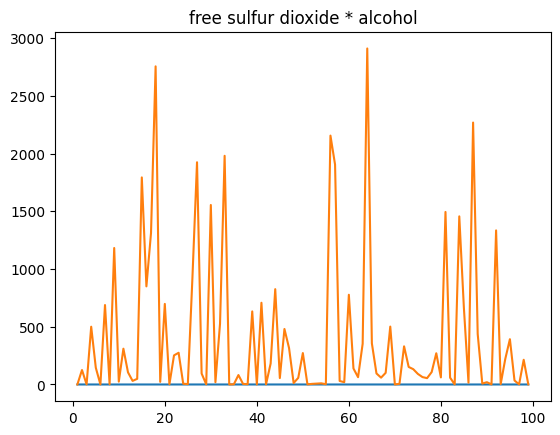

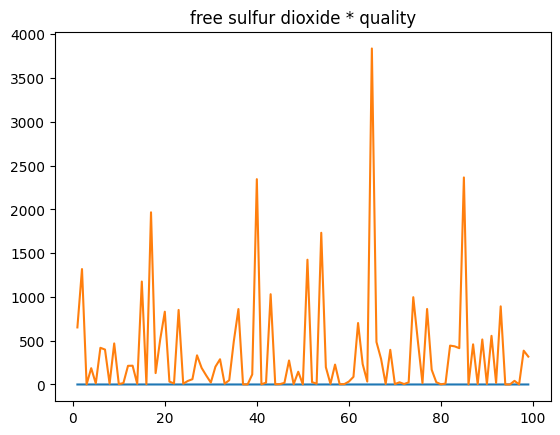

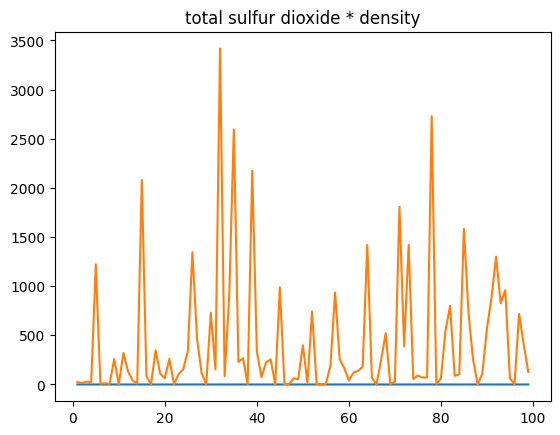

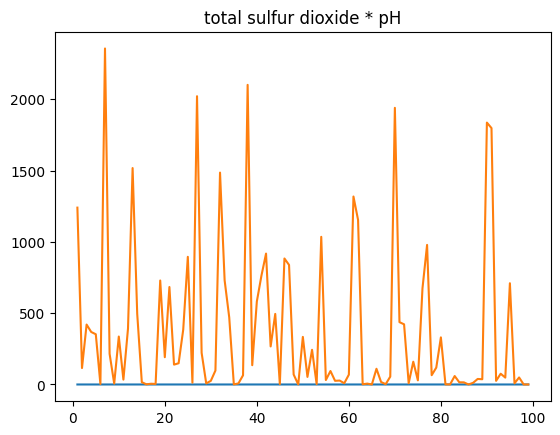

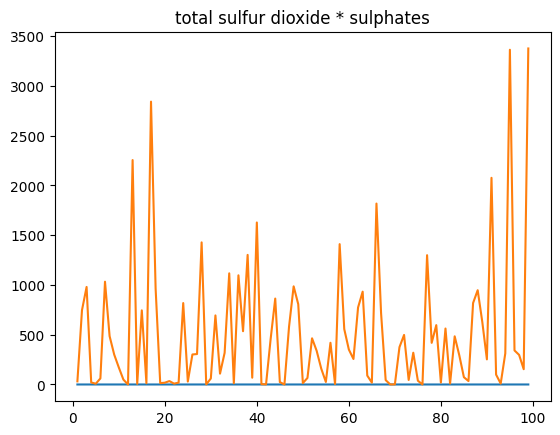

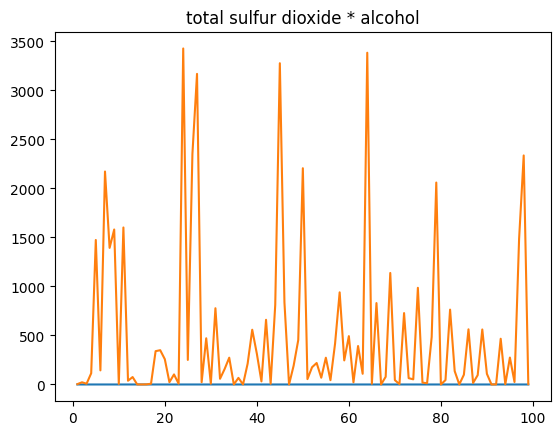

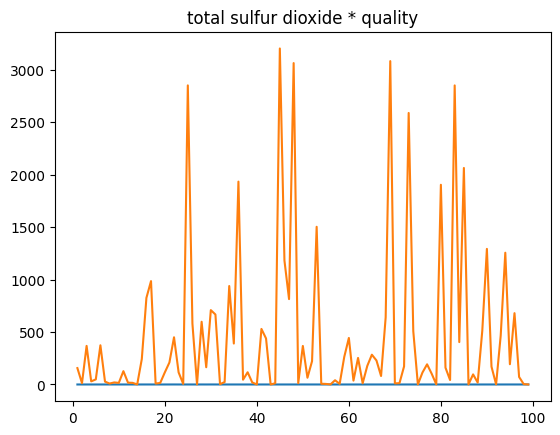

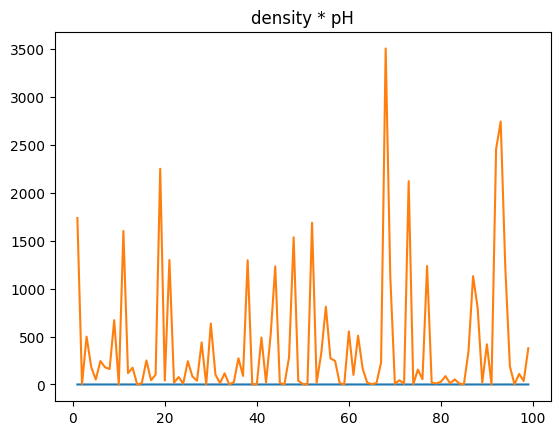

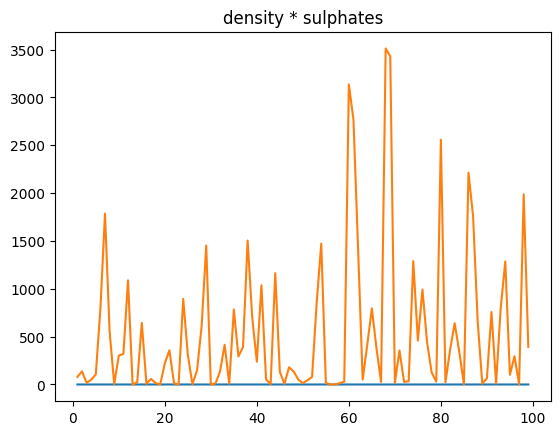

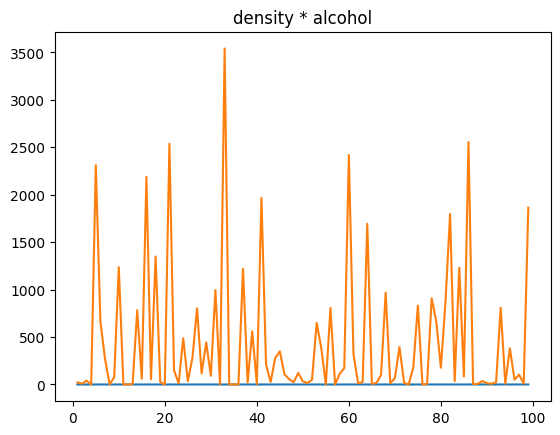

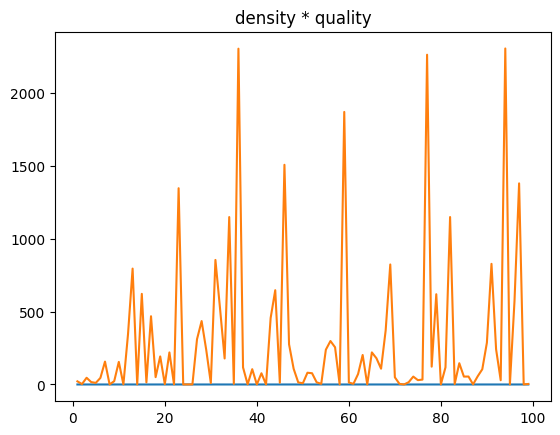

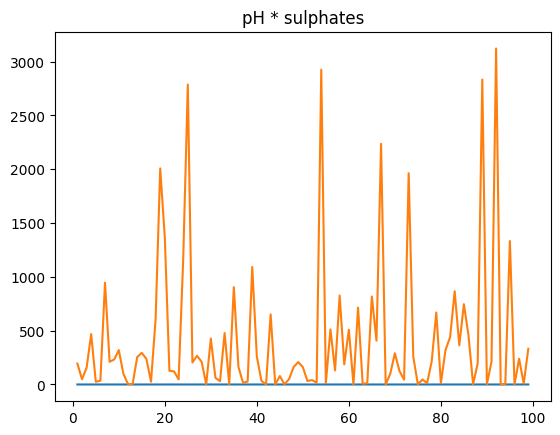

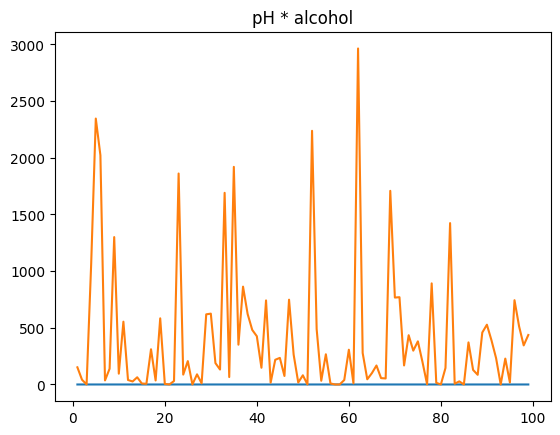

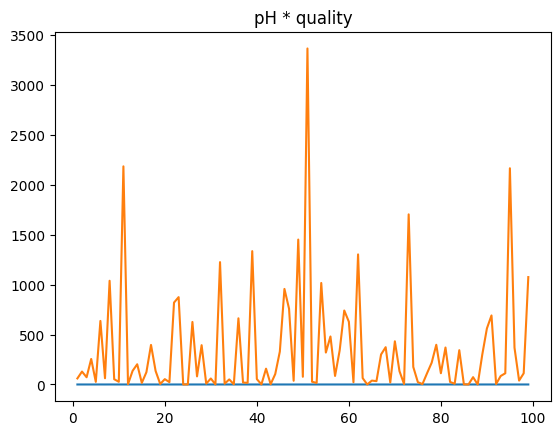

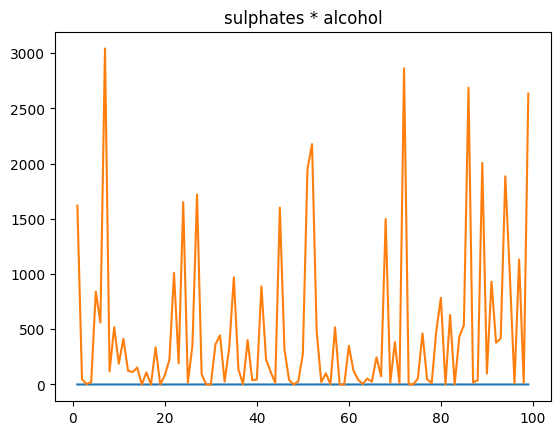

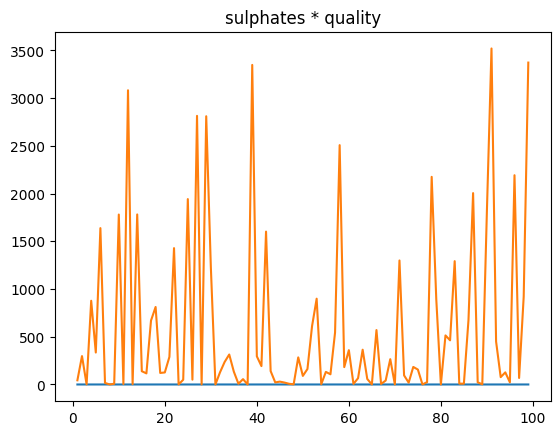

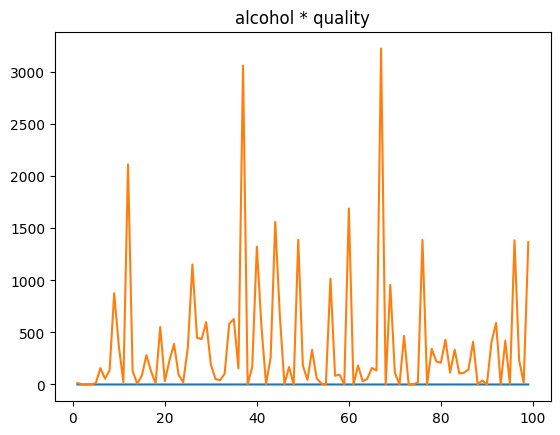

In [3]:
y1 = []
y2 = []
groups = []
mse_hist = []
mse_sketch = []
cnt = 0
for i in range(data.shape[0]):
    if (i == 0) or (data.iloc[i, 0] == data.iloc[i - 1, 0]):
        y1.append(data.iloc[i, 1])
        y2.append(data.iloc[i, 2])
        cnt = cnt + 1
    else:
        plt.title(data.iloc[i - 1, 0])
        plt.plot(range(1, cnt + 1), y1, label="2D Histogram")
        plt.plot(range(1, cnt + 1), y2, label="CM Sketch")
        plt.show()
        groups.append(data.iloc[i - 1, 0])
        mse_hist.append(sum(y1) / len(y1))
        mse_sketch.append(sum(y2) / len(y2))
        y1 = []
        y2 = []
        cnt = 0

plt.title(data.iloc[i - 1, 0])
plt.plot(range(1, cnt + 1), y1, label="2D Histogram")
plt.plot(range(1, cnt + 1), y2, label="CM Sketch")
plt.show()
groups.append(data.iloc[i - 1, 0])
mse_hist.append(sum(y1) / len(y1))
mse_sketch.append(sum(y2) / len(y2))
y1 = []
y2 = []
cnt = 0

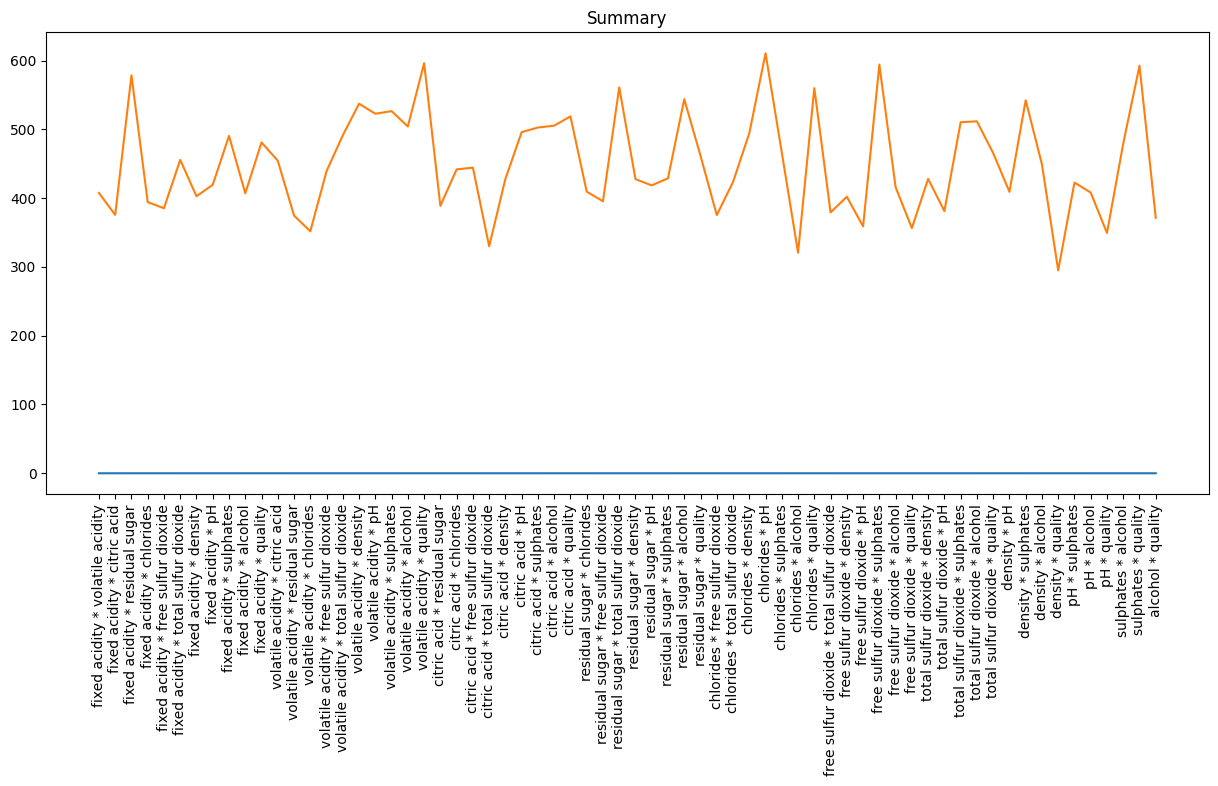

In [4]:
plt.figure(figsize=(15, 6))
plt.title("Summary")
plt.xticks(rotation=90)
plt.plot(groups, mse_hist, label="2D Histogram")
plt.plot(groups, mse_sketch, label="CM Sketch")
plt.show()

## Result

The result indicates that the using only one hash function with the same size of counter results in great error.